### Business Problem

Create a predictive model to forecast housing prices in California using the fetch_california_housing dataset. The model aims to understand housing trends and strategize investments and regulatory decisions to address market affordability and stability.

### Exploratory Data Analysis

##### Descriptive Statistics

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("Dataset shape:", X.shape)
print(X.head())
print("Missing values in each feature:\n", X.isnull().sum())
print(X.describe())

Dataset shape: (20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Missing values in each feature:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899

##### Data Visualizations

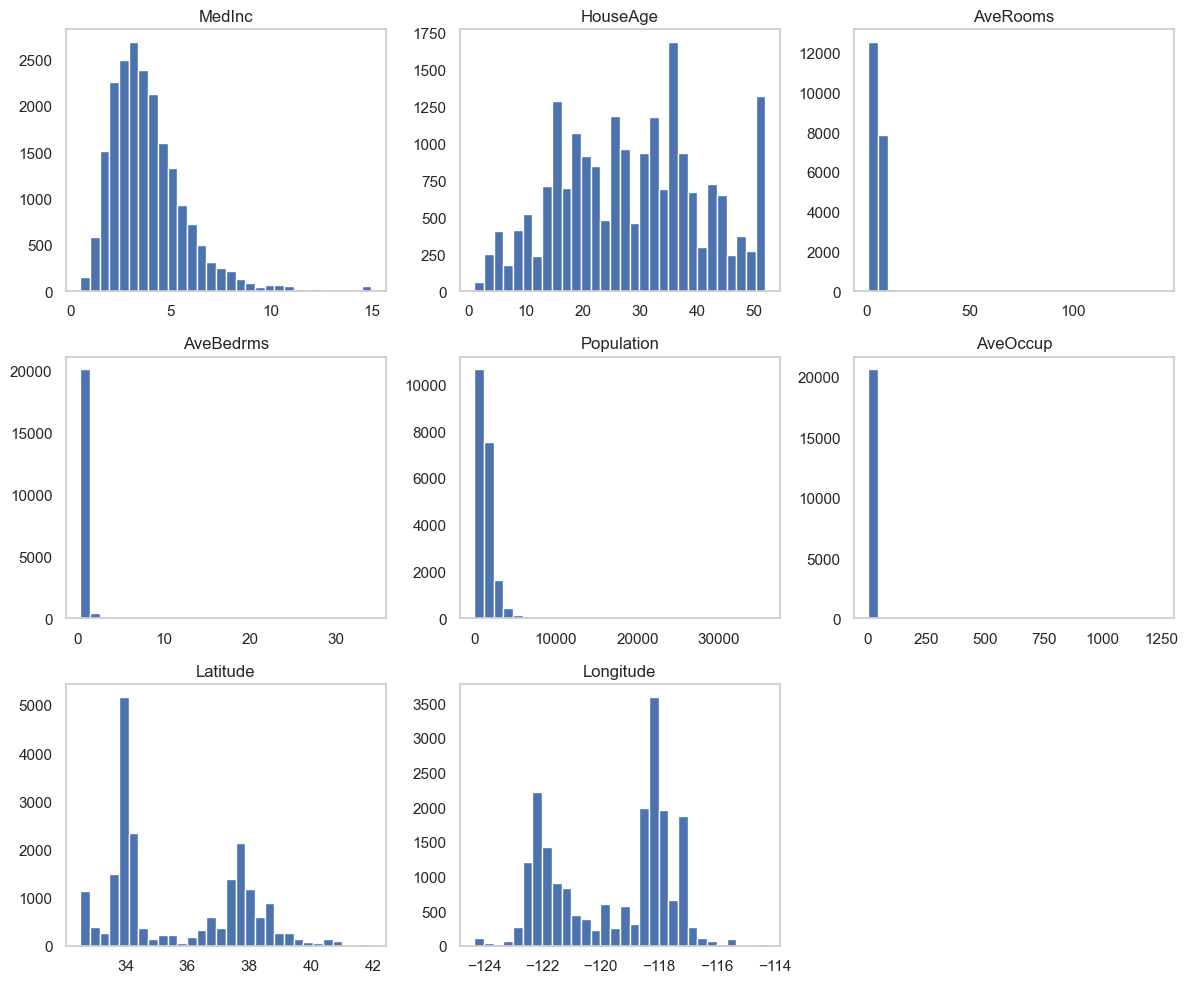

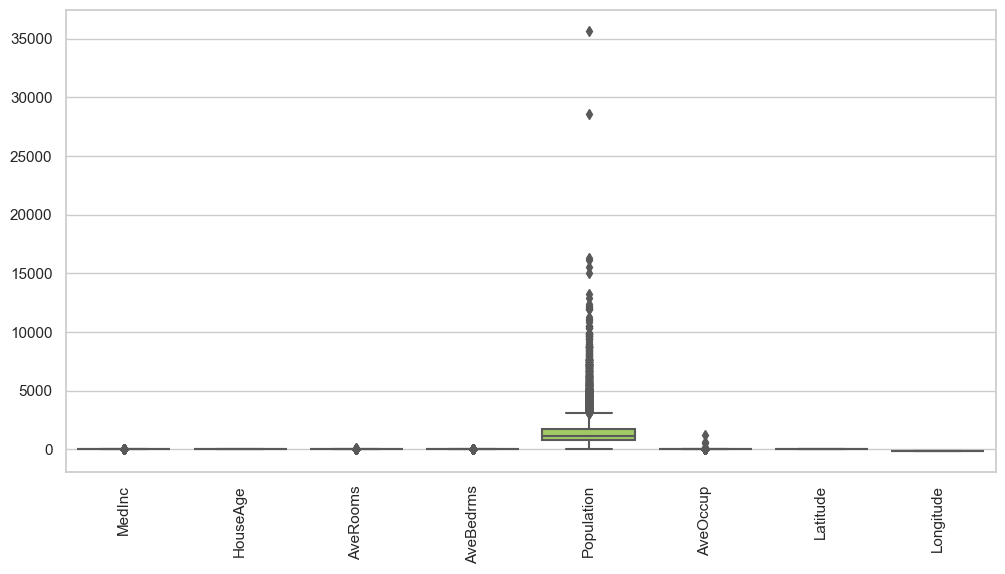

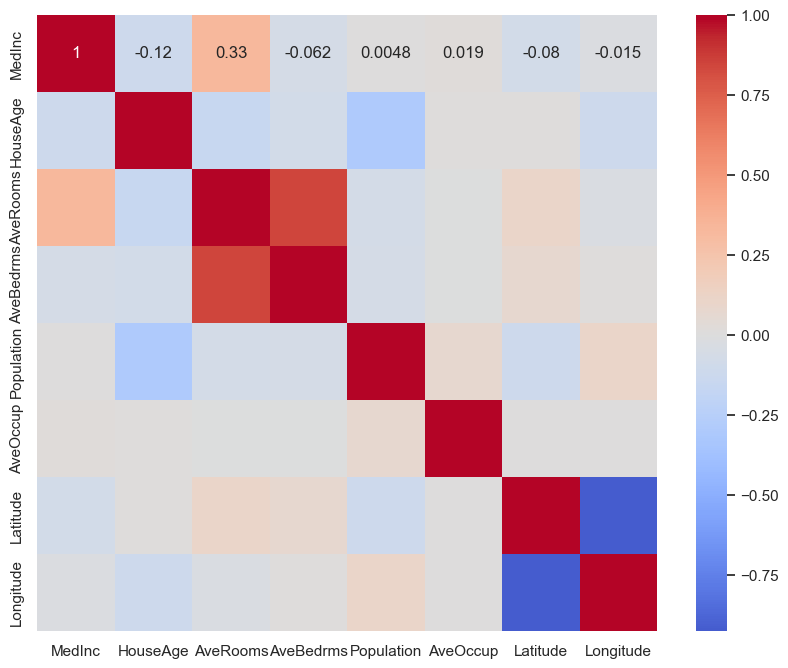

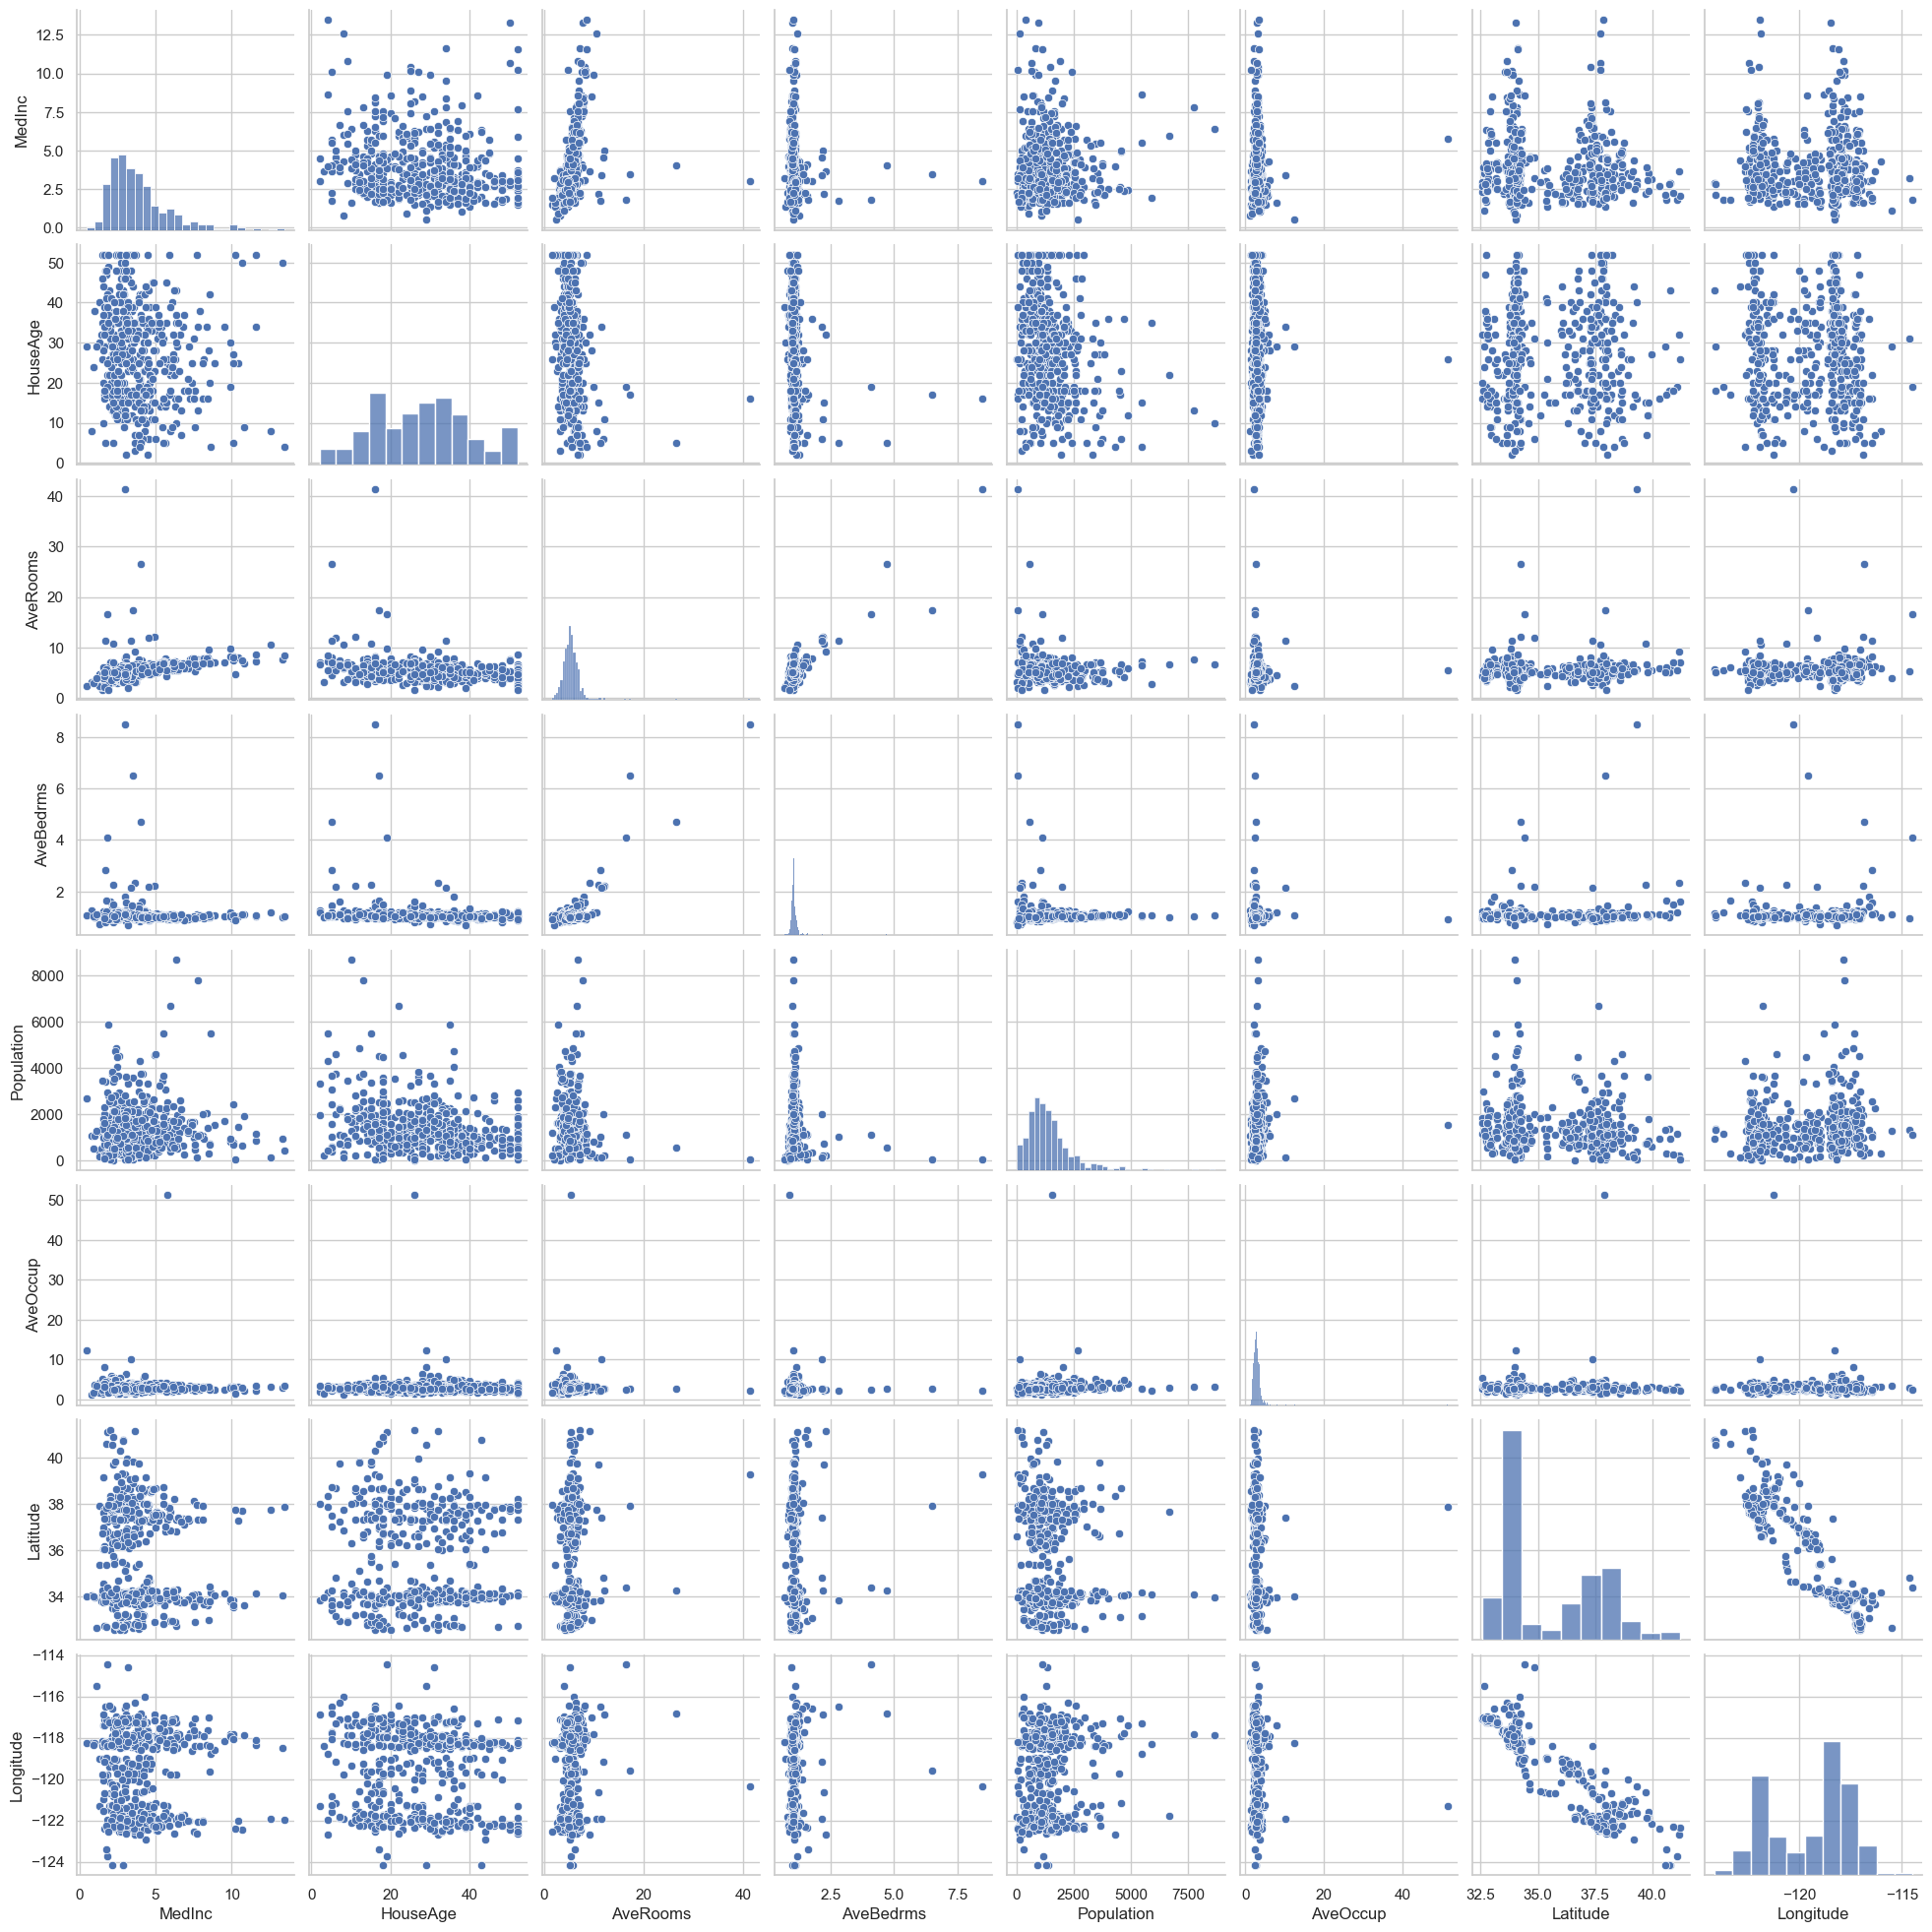

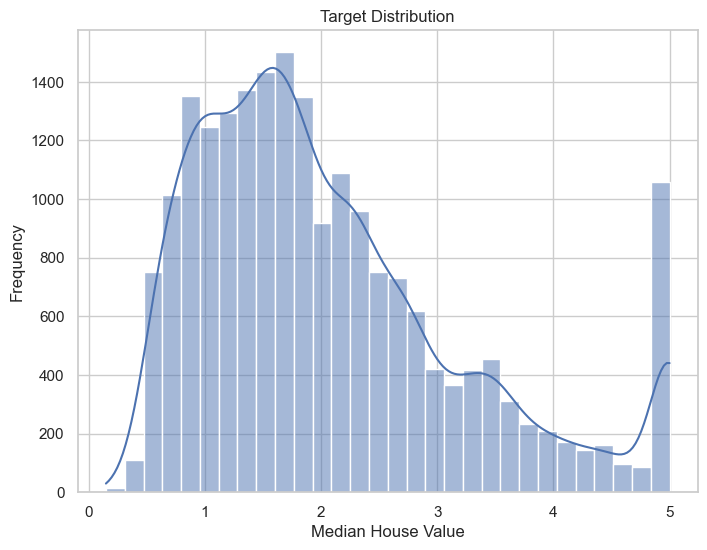

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style='whitegrid')  # Set the style for seaborn plots

# Histograms of the features
X.hist(bins=30, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

# Boxplots of the features to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, palette="Set2")
plt.xticks(rotation=90)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

# Pairplot to observe pairwise relationships between features
# Note: This can be slow for large datasets. You may want to sample the data or drop some features.
sns.pairplot(X.sample(500))  # Using a sample of 500 for quicker rendering
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Target Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [4]:
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define hyperparameters for each model
hyperparameters = {
    'Ridge': {'model__alpha': [0.1, 1, 10]},
    'Lasso': {'model__alpha': [0.1, 1, 10]},
    'ElasticNet': {'model__alpha': [0.1, 1, 10], 'model__l1_ratio': [0.2, 0.5, 0.8]},
    'Gradient Boosting': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1]},
    'Decision Tree': {'model__max_depth': [5, 10, 20]},
    'Random Forest': {'model__n_estimators': [100, 200], 'model__max_depth': [5, 10, 20]}
}

# Standardize features
scaler = StandardScaler()

# Evaluate each model
for name, model in models.items():
    pipeline = Pipeline([('scaler', scaler), ('model', model)])
    
    # If the model requires hyperparameter tuning
    if name in hyperparameters:
        clf = GridSearchCV(pipeline, hyperparameters[name], cv=5, scoring='neg_mean_squared_error')
    else:
        clf = pipeline
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"{name}: Best parameters: {clf.best_params_ if name in hyperparameters else 'N/A'}")
    print(f"{name}: MSE: {mse}\n")

Linear Regression: Best parameters: N/A
Linear Regression: MSE: 0.555891598695244

Ridge: Best parameters: {'model__alpha': 0.1}
Ridge: MSE: 0.5558879138674189

Lasso: Best parameters: {'model__alpha': 0.1}
Lasso: MSE: 0.6796290284328825

ElasticNet: Best parameters: {'model__alpha': 0.1, 'model__l1_ratio': 0.2}
ElasticNet: MSE: 0.6012812713499678

Gradient Boosting: Best parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
Gradient Boosting: MSE: 0.2614582550879014

Decision Tree: Best parameters: {'model__max_depth': 10}
Decision Tree: MSE: 0.4195966744754244

Random Forest: Best parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
Random Forest: MSE: 0.25159872884922624



Among the models evaluated, the Gradient Boosting Regressor yielded the best performance with the lowest MSE of 0.2615, suggesting it provides the most accurate predictions for housing prices in the dataset with an optimal learning rate of 0.1 and 200 estimators. The Decision Tree Regressor, with a max depth of 10, also improved over the baseline linear models, but was outperformed by Gradient Boosting, achieving an MSE of 0.4196.